In [ ]:
%pip install great_expectations
%pip install seaborn

In [ ]:
%kaggle datasets download -d parsabg/stocknewseventssentiment-snes-10


In [ ]:
import zipfile

zip_file_path = '/content/stocknewseventssentiment-snes-10.zip'

extract_to_path = '/content/data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def sample_data():
  df = pd.read_csv('../data/samples/sample.csv')
  seed = 42

  df = df.sample(frac=1, random_state=seed).reset_index(drop=True)
  sample_size = 10000

  samples = []

  for i in range(0, len(df), sample_size):
      sample = df[i:i+sample_size]
      samples.append(sample)

  return samples


In [3]:
stock_data = pd.read_csv('../data/samples/sample.csv')

# Data Description and exploration

### Description of the data:

In [5]:
stock_data = sample_data()[0]

NameError: name 'sample_data' is not defined

In [11]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,...,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors
0,2022-04-14,2612.989990,2614.205078,2542.229980,2545.060059,2545.060059,1174200.0,GOOG,Alphabet Inc. (Class C),Communication Services,...,9.0,12.0,0.0,10.0,2.0,8.0,0.0,45.0,1.0,0.0
1,2021-03-22,285.970001,291.700012,285.230011,288.130005,288.130005,345200.0,CRL,Charles River Laboratories,Health Care,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2022-04-25,51.450001,51.980000,50.540001,51.939999,51.476685,18677000.0,CSCO,Cisco,Information Technology,...,11.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-16,90.650002,91.870003,90.449997,91.440002,88.053406,798100.0,CHRW,C.H. Robinson,Industrials,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-03-21,49.009998,49.799999,48.790001,49.250000,48.952774,2982200.0,XRAY,Dentsply Sirona,Health Care,...,3.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           10000 non-null  object 
 1   Open                           10000 non-null  float64
 2   High                           10000 non-null  float64
 3   Low                            10000 non-null  float64
 4   Close                          10000 non-null  float64
 5   Adj Close                      10000 non-null  float64
 6   Volume                         10000 non-null  float64
 7   Symbol                         10000 non-null  object 
 8   Security                       10000 non-null  object 
 9   GICS Sector                    10000 non-null  object 
 10  GICS Sub-Industry              10000 non-null  object 
 11  News - All News Volume         9969 non-null   float64
 12  News - Volume                  9969 non-null   

The dataset consists of 10000 entries each with 27 columns, capturing both market and news data related to stock performance:
------------------------
>**Close** is the target value\
**Adj Close** represents adjusted closing price of the stock which is not known at prediction time


| | | | | |
|---|------|-----|---|---|
|1 | Date | The trading date.| Date
|2. |Open | The opening price of the stock.| num
|3. |High | The highest price of the stock during the trading day.|num
|4. |Low| The lowest price of the stock during the trading day.|num
|5. |Close| The closing price of the stock. | num| TARGET
|6. |Adj Close| The adjusted closing price of the stock.|num
|7. |Volume| The number of shares traded.|num
|8. |Symbol| The stock ticker symbol.| text
|9. |Security| The name of the companh.| text
|10. |GICS Sector| The Global Industry Classification Standard (GICS) sector.| categorical
|11. |GICS Sub-Industry| The GICS sub-industry.| text

News Data Features (numerical):

| | | | |
|---|---|---|---|
|12. |News - All News Volume| Total volume of news articles.|
|13. |News - Volume| Volume of relevant news articles.|
|14. |News - Positive Sentiment| Volume of positive sentiment news articles.|
|15. |News - Negative Sentiment| Volume of negative sentiment news articles.|
|16. |News - New Products| Volume of news articles about new products.|
|17. |News - Layoffs|Volume of news articles about layoffs.|
|18. |News - Analyst Comments| Volume of news articles with analyst comments.|
|19. |News - Stocks| Volume of news articles about stocks.|
|20. |News - Dividends|Volume of news articles about dividends.|
|21. |News - Corporate Earnings| Volume of news articles about corporate earnings.|
|22. |News - Mergers & Acquisitions| Volume of news articles about mergers and acquisitions.|
|23. |News - Store Openings| Volume of news articles about store openings.|
|24. |News - Product Recalls|Volume of news articles about product recalls.|
|25. |News - Adverse Events| Volume of news articles about adverse events.|
|26. |News - Personnel Changes|Volume of news articles about personnel changes.|
|27. |News - Stock Rumors|Volume of news articles about stock rumors.

## Checking for missing values

>The following block shows that only news features contain missing values, moreover the values are missed for same rows. In such case we can remove these rows as it is 0.31 of the data sample and will not strongly affect the overall statistics and model performance

In [13]:
missing_values = stock_data.isnull().sum()
print("Missing values per feature:")
print(missing_values)

Missing values per feature:
Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Adj Close                         0
Volume                            0
Symbol                            0
Security                          0
GICS Sector                       0
GICS Sub-Industry                 0
News - All News Volume           31
News - Volume                    31
News - Positive Sentiment        31
News - Negative Sentiment        31
News - New Products              31
News - Layoffs                   31
News - Analyst Comments          31
News - Stocks                    31
News - Dividends                 31
News - Corporate Earnings        31
News - Mergers & Acquisitions    31
News - Store Openings            31
News - Product Recalls           31
News - Adverse Events            31
News - Personnel Changes         31
News - Stock Rumors              31


In [14]:
null_rows = stock_data.isnull().any(axis=1)

num_null_rows = null_rows.sum()
null_counts = stock_data[null_rows].isnull().sum(axis=1)

print("Number of rows with missing values:", num_null_rows)
print("Number of columns with missing values", sum(1 for miss_val in missing_values if miss_val > 0))
print("Missing values per row:")
print(null_counts)

Number of rows with missing values: 31
Number of columns with missing values 16
Missing values per row:
101     16
128     16
262     16
556     16
798     16
1611    16
2225    16
2229    16
2631    16
2655    16
2686    16
2708    16
2769    16
2775    16
2970    16
2999    16
3961    16
3997    16
4059    16
4303    16
4701    16
4990    16
5786    16
6042    16
6896    16
7483    16
8391    16
8407    16
9331    16
9372    16
9535    16
dtype: int64


## Checking for duplicates
> The following code block shows that the dataset has no duplicate rows so there is no need to handle it

In [15]:
duplicates = stock_data[stock_data.duplicated()]

# Print duplicates if any
if len(duplicates) > 0:
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


## Analyzing non-numeric features
---------------------------------
The following code block shows the number of unique elements for each non-numerical feature in the dataset.\

-  ```Symbol``` and ```Security``` features represent the number of companies the dataset includes, so they have same number of unique values and therefore we can remove ```Secirity``` feature as it is redundant

-  ```Symbol``` has 495 unique values which is not suitable for one-hot-encoding so the good option is to hash-encode it

-  ```GICS Sector``` feature has 11 types of sector so it can be treated as categorical and be one-hot encoded

- ```GICS Sub-Industry``` feature classifies companies as well however due to 120 unique values and natural language-like characteristics, embedding techniques such as word2vec will be employed to represent it.

/tmp/ipykernel_61934/3852527743.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')


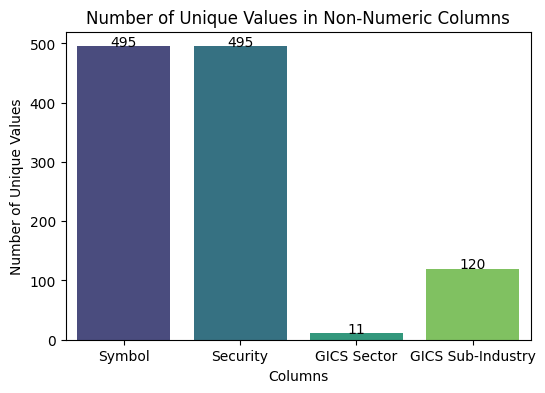

In [16]:
non_num_cols = ['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry']
unique_counts = stock_data[non_num_cols].nunique()
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')

for index, value in enumerate(unique_counts.values):
    bar_plot.text(index, value, str(value), color='black', ha="center")

plt.title('Number of Unique Values in Non-Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')

plt.show()

## Analyzing numerical features

In [17]:
print(f'There are {len(stock_data.select_dtypes(include=["number"]).columns)} numerical features')

There are 22 numerical features


> Dataset includes 22 numerical features. We will start by analyzing them.\
Histogram will show how the data is distributedd

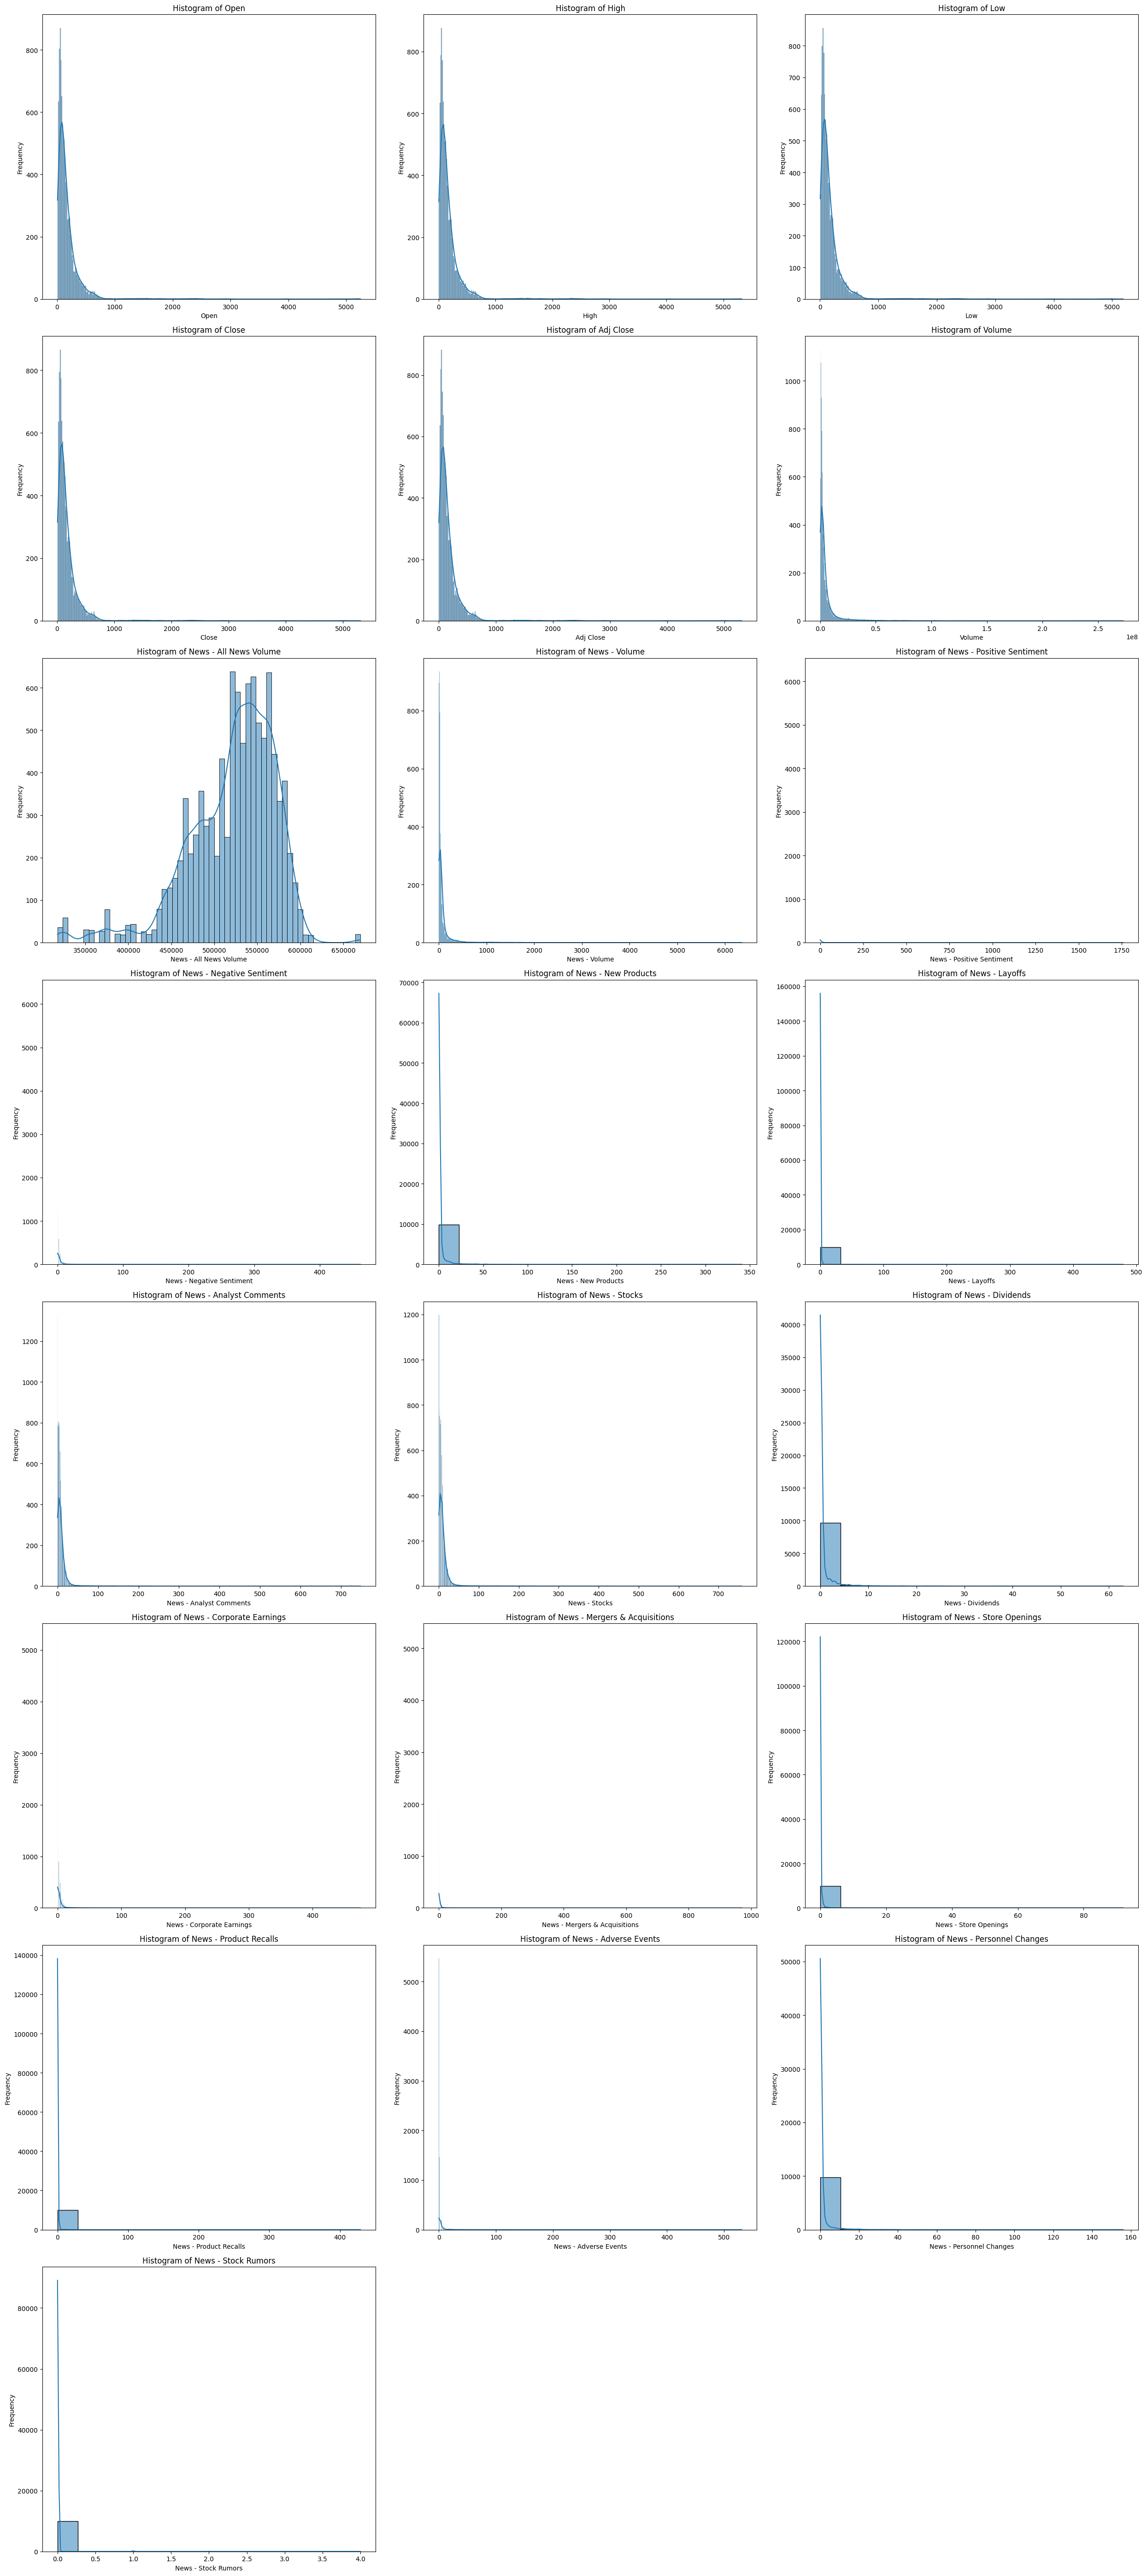

In [18]:
numeric_cols = stock_data.select_dtypes(include=["number"]).columns
num_row_plot = len(numeric_cols) // 3 + 1
plt.figure(figsize=(25, 7*num_row_plot))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_row_plot, 3, i)
    sns.histplot(stock_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Data sparcity analysis

> News features represent the volume of some kind of news about company. The histogram shows that some of these features are rather sparse - have mostly zero values. Let us check it :

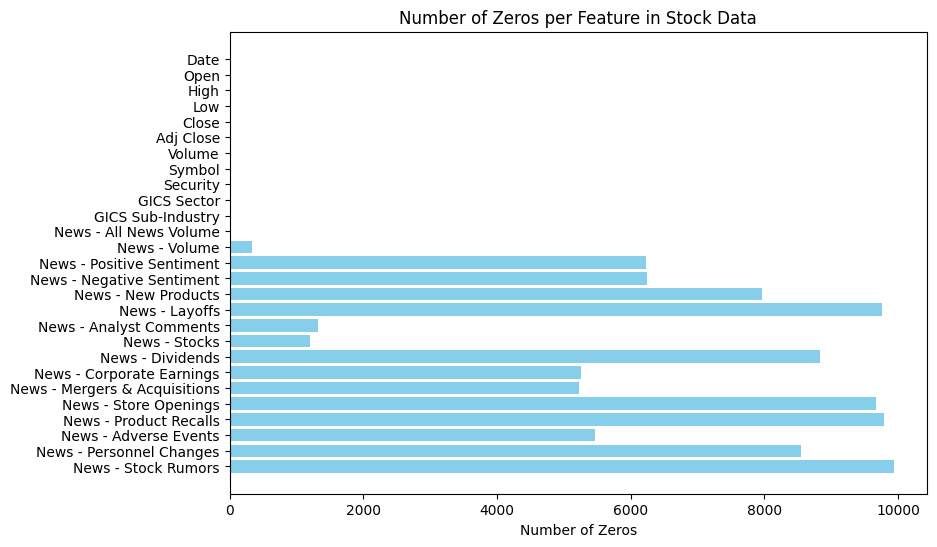

very high sparsity > 95% 

  News - Layoffs (97.55%)
  News - Store Openings (96.72%)
  News - Product Recalls (97.93%)
  News - Stock Rumors (99.40%)

---------------
high sparsity 80-95%

  News - Dividends (88.36%)
  News - Personnel Changes (85.45%)

---------------
moderate sparsity 50-80%

  News - Positive Sentiment (62.24%)
  News - Negative Sentiment (62.48%)
  News - New Products (79.72%)
  News - Corporate Earnings (52.53%)
  News - Mergers & Acquisitions (52.22%)
  News - Adverse Events (54.63%)

---------------
low sparsity < 50%

  News - Volume (3.30%)
  News - Analyst Comments (13.27%)
  News - Stocks (11.97%)


In [19]:
stock_data_zeros = {'Features': stock_data.columns, 'Zeros': (stock_data == 0).sum()}
df = pd.DataFrame(stock_data_zeros)
plt.figure(figsize=(9, 6))
plt.barh(df['Features'], df['Zeros'], color='skyblue')
plt.xlabel('Number of Zeros')
plt.title('Number of Zeros per Feature in Stock Data')
plt.gca().invert_yaxis()
plt.show()


df['Zeros'] = (stock_data_zeros['Zeros'] / len(stock_data)) * 100
print('very high sparsity > 95% \n')
for index, row in df.iterrows():
  if row['Zeros'] > 95:
      print(f"  {row['Features']} ({row['Zeros']:.2f}%)")

print('\n---------------\nhigh sparsity 80-95%\n')
for index, row in df.iterrows():
  if 80 < row['Zeros'] < 95:
      print(f"  {row['Features']} ({row['Zeros']:.2f}%)")

print('\n---------------\nmoderate sparsity 50-80%\n')
for index, row in df.iterrows():
  if 50 < row['Zeros'] < 80:
      print(f"  {row['Features']} ({row['Zeros']:.2f}%)")

print('\n---------------\nlow sparsity < 50%\n')
for index, row in df.iterrows():
  if 0<row['Zeros'] < 50:
      print(f"  {row['Features']} ({row['Zeros']:.2f}%)")


Analysis indicates that some features in the dataset are extremely sparse. These features could increase the complexity of the model without significantly improving predictive accuracy. However, before removing these features, it is essential to evaluate their impact on the target variable to determine if they contribute valuable information.

-----
<br>

## Feature dependencies analysis
In this section we are trying to investigate dependencies between features and target.\
It is shown that open, high and low prices have a strong correlation with the target value.\
At the same time the features that were shown to be sparse have extremily small correlation with target which means they will not contribute the prediction but create a noise and make model more complex. We should remove these features.

/tmp/ipykernel_64710/1372942784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')


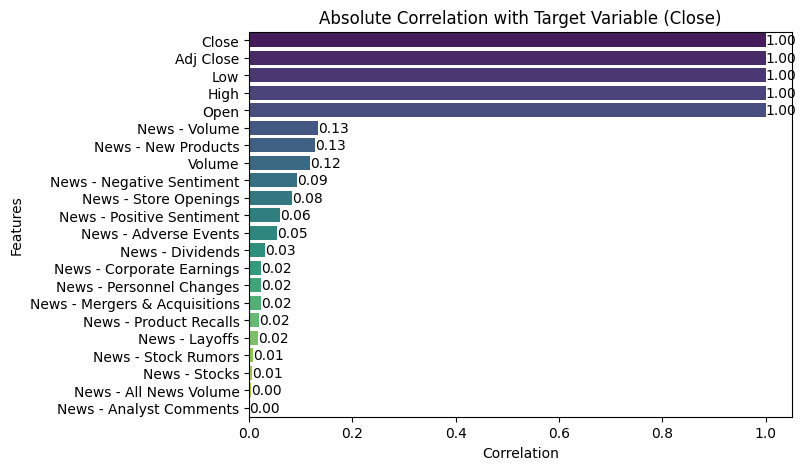

Features with low correlation with Close:
News - Dividends                 0.031043
News - Corporate Earnings        0.023866
News - Personnel Changes         0.023605
News - Mergers & Acquisitions    0.022578
News - Product Recalls           0.018805
News - Layoffs                   0.017841
News - Stock Rumors              0.007583
News - Stocks                    0.005268
News - All News Volume           0.003852
News - Analyst Comments          0.000658
Name: Close, dtype: float64


In [7]:
numeric_cols = stock_data.select_dtypes(include=["number"]).columns
correlation_matrix = stock_data[numeric_cols].corr()
correlation_with_target = correlation_matrix['Close'].abs().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')

plt.title('Absolute Correlation with Target Variable (Close)')
plt.xlabel('Correlation')
plt.ylabel('Features')

# Annotate each bar with the correlation value
for i, (value, name) in enumerate(zip(correlation_with_target.values, correlation_with_target.index)):
    ax.text(value, i, f'{value:.2f}', va='center')

plt.show()


low_correlation = correlation_with_target[correlation_with_target < 0.05]
print("Features with low correlation with Close:")
print(low_correlation)

In [8]:
example_data = stock_data[:]

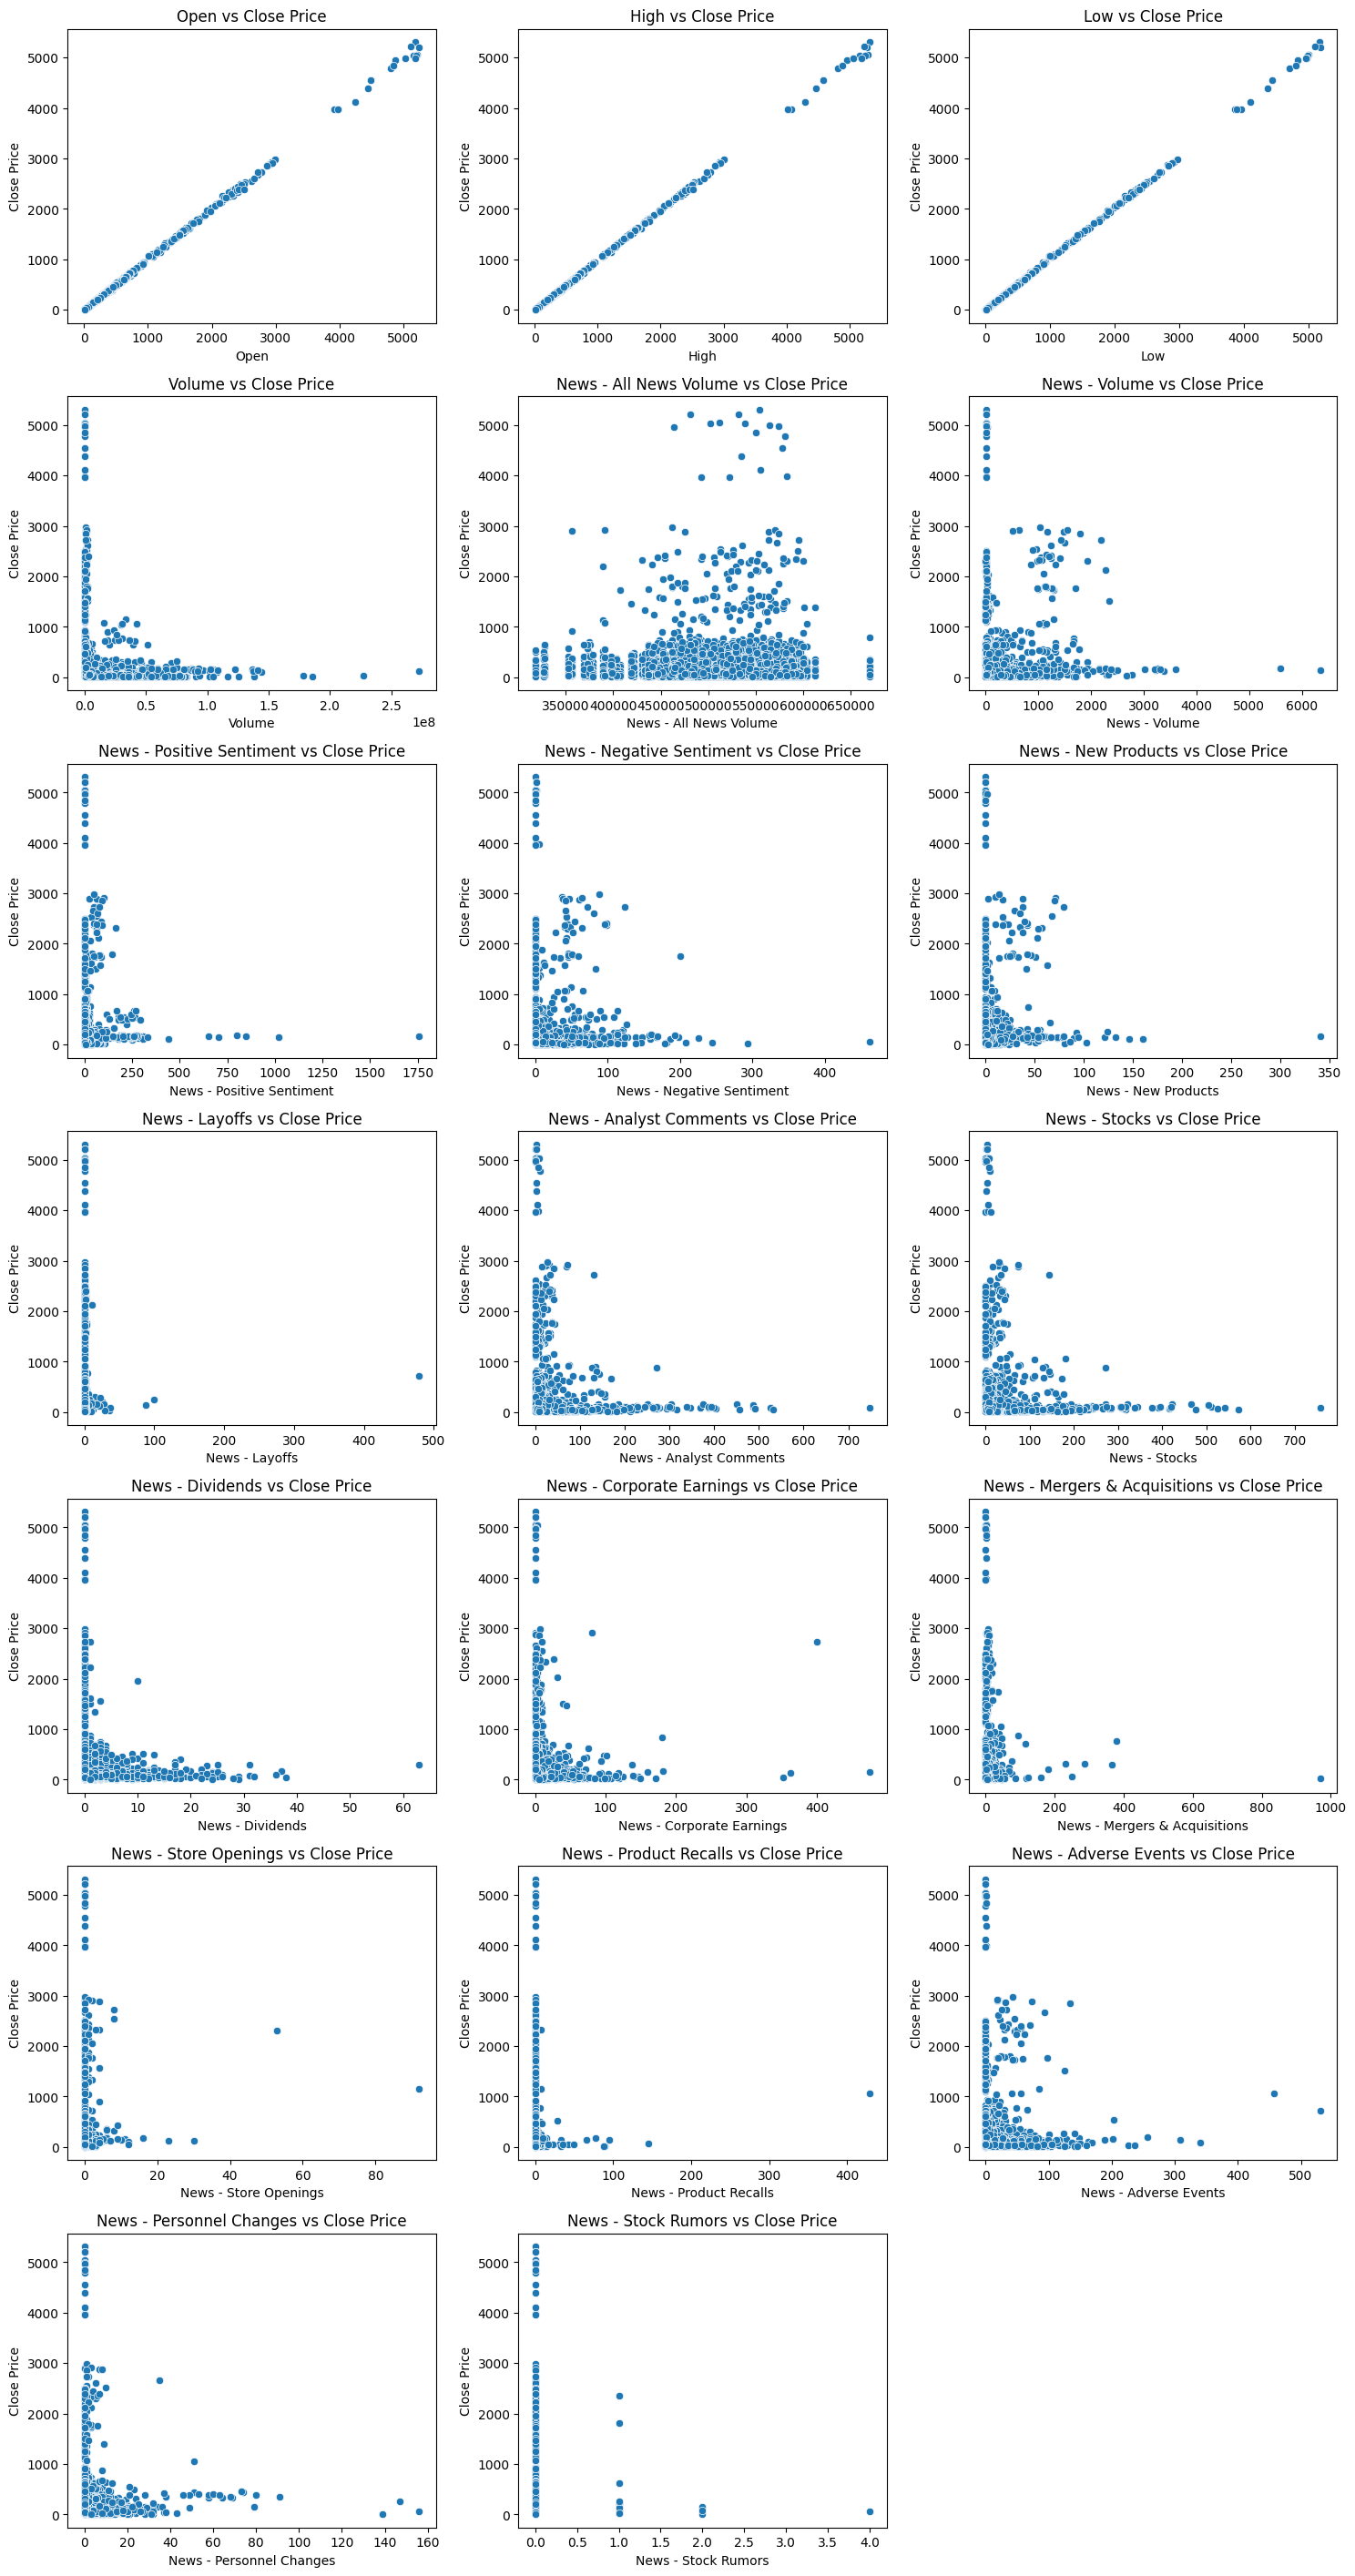

In [22]:

plt.figure(figsize=(15, 4*num_row_plot))
numeric_cols = stock_data.select_dtypes(include=["number"]).columns
numeric_cols = numeric_cols.drop(['Close',
                                  'Adj Close'])

for i, col in enumerate(numeric_cols, 1):
  if col != 'Close':
    plt.subplot(num_row_plot, 3, i)
    sns.scatterplot(x=example_data[col], y=example_data['Close'])
    plt.title(f'{col} vs Close Price')
    plt.xlabel(col)
    plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

### Preliminary model choice
The 'Open', 'High', 'Low' features show high correlation and linear dependency with the target 'Close', indicating strong predictive power for these variables. Conversely, news sentiment features exhibit very low correlation and no apparent linear relationship with the target, suggesting limited utility in a purely linear modeling context. Given that we will consider the following ML methods:
- <u>Ensemble Methods</u>
- <u>Neural Networks</u>

If these methods yield poor accuracy, we will consider simplifying the model by removing **all** the news features, which show low linear dependency with the target variable. This adjustment would allow us to explore the effectiveness of <u>Linear Regression </u>

--------
<br>

In [9]:
print(low_correlation.index)

Index(['News - Dividends', 'News - Corporate Earnings',
       'News - Personnel Changes', 'News - Mergers & Acquisitions',
       'News - Product Recalls', 'News - Layoffs', 'News - Stock Rumors',
       'News - Stocks', 'News - All News Volume', 'News - Analyst Comments'],
      dtype='object')


# Data cleaning and transformation:

Overall, the data is of a good quality but it needs some cleaning and transformation.\
To clean the data we will
- remove rows with missing values
- remove ```Symbol``` column
- remove ```Adj Close``` column
- remove columns
>      'News - Dividends', 'News - Corporate Earnings',
       'News - Personnel Changes', 'News - Mergers & Acquisitions',
       'News - Product Recalls', 'News - Layoffs', 'News - Stock Rumors',
       'News - Stocks', 'News - All News Volume', 'News - Analyst Comments'

To transform the data we will
- perform cyclic encoding on ```Date``` feature
- hash-encode ```Symbol``` feature
- one-hot encode ```GICS Sector``` feature
- use word2vec embedding on ```GICS Sub-Industry``` feature

### Removing redundant features

In [10]:
stock_data_cleaned = stock_data.drop(['Security', 'Adj Close'], axis=1)
stock_data_cleaned = stock_data_cleaned.drop(low_correlation.index, axis=1)
stock_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       10000 non-null  object 
 1   Open                       10000 non-null  float64
 2   High                       10000 non-null  float64
 3   Low                        10000 non-null  float64
 4   Close                      10000 non-null  float64
 5   Volume                     10000 non-null  float64
 6   Symbol                     10000 non-null  object 
 7   GICS Sector                10000 non-null  object 
 8   GICS Sub-Industry          10000 non-null  object 
 9   News - Volume              9969 non-null   float64
 10  News - Positive Sentiment  9969 non-null   float64
 11  News - Negative Sentiment  9969 non-null   float64
 12  News - New Products        9969 non-null   float64
 13  News - Store Openings      9969 non-null   floa

## Removing the Null rows
Here we remove the rows that contain all nulls for news features and check how the dataset changed

In [11]:
stock_data_cleaned = stock_data_cleaned.dropna()
stock_data_cleaned.reset_index(drop=True, inplace=True)
stock_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       9969 non-null   object 
 1   Open                       9969 non-null   float64
 2   High                       9969 non-null   float64
 3   Low                        9969 non-null   float64
 4   Close                      9969 non-null   float64
 5   Volume                     9969 non-null   float64
 6   Symbol                     9969 non-null   object 
 7   GICS Sector                9969 non-null   object 
 8   GICS Sub-Industry          9969 non-null   object 
 9   News - Volume              9969 non-null   float64
 10  News - Positive Sentiment  9969 non-null   float64
 11  News - Negative Sentiment  9969 non-null   float64
 12  News - New Products        9969 non-null   float64
 13  News - Store Openings      9969 non-null   float

## Data encoding

> In this section we need to encode all non-numeric data in the way that the data would be represented in the appropriate form to pass it to the model.

### Cyclic encoding on Date

In [12]:
import numpy as np
def encode_time (data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

In [13]:
time_info = stock_data_cleaned["Date"]
time_info = pd.to_datetime(time_info)

stock_data_cleaned.loc[:, 'Day'] = time_info.dt.day
stock_data_cleaned = encode_time(stock_data_cleaned, 'Day', 31)

stock_data_cleaned["Month"] = time_info.dt.month
stock_data_cleaned = encode_time(stock_data_cleaned, 'Month', 12)

stock_data_cleaned["Year"] = time_info.dt.year

stock_data_cleaned = stock_data_cleaned.drop('Month',axis=1)
stock_data_cleaned = stock_data_cleaned.drop('Day',axis=1)

stock_data_cleaned = stock_data_cleaned.drop('Date', axis=1)
stock_data_cleaned.head()


,Open,High,Low,Close,Volume,Symbol,GICS Sector,GICS Sub-Industry,News - Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,News - Store Openings,News - Adverse Events,Day_sin,Day_cos,Month_sin,Month_cos,Year
0,2612.989990,2614.205078,2542.229980,2545.060059,1174200.0,GOOG,Communication Services,Interactive Media & Services,958.0,61.0,43.0,67.0,8.0,45.0,0.299363,-0.954139,8.660254e-01,-5.000000e-01,2022
1,285.970001,291.700012,285.230011,288.130005,345200.0,CRL,Health Care,Life Sciences Tools & Services,9.0,0.0,0.0,0.0,0.0,1.0,-0.968077,-0.250653,1.000000e+00,6.123234e-17,2021
2,51.450001,51.980000,50.540001,51.939999,18677000.0,CSCO,Information Technology,Communications Equipment,76.0,2.0,0.0,0.0,0.0,0.0,-0.937752,0.347305,8.660254e-01,-5.000000e-01,2022
3,90.650002,91.870003,90.449997,91.440002,798100.0,CHRW,Industrials,Air Freight & Logistics,11.0,0.0,0.0,0.0,0.0,0.0,-0.101168,-0.994869,-2.449294e-16,1.000000e+00,2020
4,49.009998,49.799999,48.790001,49.250000,2982200.0,XRAY,Health Care,Health Care Supplies,10.0,0.0,0.0,0.0,0.0,0.0,-0.897805,-0.440394,1.000000e+00,6.123234e-17,2022


### One-hot-encoding on GICS Sector

In [14]:
stock_data_cleaned = pd.get_dummies(stock_data_cleaned, columns=['GICS Sector'], prefix='Sector', dtype=int)
stock_data_cleaned.head()

,Open,High,Low,Close,Volume,Symbol,GICS Sub-Industry,News - Volume,News - Positive Sentiment,News - Negative Sentiment,...,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities
0,2612.989990,2614.205078,2542.229980,2545.060059,1174200.0,GOOG,Interactive Media & Services,958.0,61.0,43.0,...,0,0,0,0,0,0,0,0,0,0
1,285.970001,291.700012,285.230011,288.130005,345200.0,CRL,Life Sciences Tools & Services,9.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,51.450001,51.980000,50.540001,51.939999,18677000.0,CSCO,Communications Equipment,76.0,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,90.650002,91.870003,90.449997,91.440002,798100.0,CHRW,Air Freight & Logistics,11.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,49.009998,49.799999,48.790001,49.250000,2982200.0,XRAY,Health Care Supplies,10.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


### Removing ```Symbol``` feature

In [15]:

stock_data_cleaned = stock_data_cleaned.drop(columns=['Symbol'], axis=1)


In [16]:
stock_data_cleaned

,Open,High,Low,Close,Volume,GICS Sub-Industry,News - Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,...,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities
0,2612.989990,2614.205078,2542.229980,2545.060059,1174200.0,Interactive Media & Services,958.0,61.0,43.0,67.0,...,0,0,0,0,0,0,0,0,0,0
1,285.970001,291.700012,285.230011,288.130005,345200.0,Life Sciences Tools & Services,9.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,51.450001,51.980000,50.540001,51.939999,18677000.0,Communications Equipment,76.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,90.650002,91.870003,90.449997,91.440002,798100.0,Air Freight & Logistics,11.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,49.009998,49.799999,48.790001,49.250000,2982200.0,Health Care Supplies,10.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,32.980000,33.310001,32.939999,33.180000,3484400.0,Health Care REITs,16.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
9965,202.970001,203.369995,198.979996,199.360001,1228800.0,Financial Exchanges & Data,50.0,1.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
9966,65.309998,65.610001,62.709999,63.689999,3643100.0,Movies & Entertainment,25.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9967,42.480000,43.139999,42.270000,42.680000,3809000.0,Regional Banks,16.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


### word2vec embedding ```GICS Sub-Industry```

In [17]:
import gensim
import os
model_path = os.path.join('..', 'models', "word2vec-google-news-300.model")
wv = gensim.models.KeyedVectors.load(model_path)

In [18]:
def get_average_embedding(text):
    words = text.split()
    embedding_vector = np.zeros((300,))
    for word in words:
        if word in wv:
            embedding_vector += wv[word]
    return embedding_vector / len(words)

In [19]:
from sklearn.decomposition import PCA

txt_embeddings = stock_data_cleaned['GICS Sub-Industry'].apply(lambda x: get_average_embedding(x))
txt_embeddings = np.array(txt_embeddings.tolist())

pca = PCA(n_components=16)
pca_result = pca.fit_transform(txt_embeddings)

embedding_cols = pd.DataFrame(pca_result, columns=[f'Emb_{i}' for i in range(16)])

stock_data_cleaned = pd.concat([stock_data_cleaned.drop('GICS Sub-Industry', axis=1), embedding_cols], axis=1)
stock_data_cleaned.head()

,Open,High,Low,Close,Volume,News - Volume,News - Positive Sentiment,News - Negative Sentiment,News - New Products,News - Store Openings,...,Emb_6,Emb_7,Emb_8,Emb_9,Emb_10,Emb_11,Emb_12,Emb_13,Emb_14,Emb_15
0,2612.989990,2614.205078,2542.229980,2545.060059,1174200.0,958.0,61.0,43.0,67.0,8.0,...,0.041598,0.037052,-0.422615,0.065939,0.108978,-0.109228,0.019312,-0.372884,-0.188059,0.204830
1,285.970001,291.700012,285.230011,288.130005,345200.0,9.0,0.0,0.0,0.0,0.0,...,-0.084829,0.148161,-0.328779,-0.076980,-0.125773,-0.100883,-0.011244,0.193076,-0.041292,0.189841
2,51.450001,51.980000,50.540001,51.939999,18677000.0,76.0,2.0,0.0,0.0,0.0,...,-0.042539,-0.076356,0.011201,-0.016467,0.182101,-0.542498,0.091022,-0.378445,-0.732799,0.346475
3,90.650002,91.870003,90.449997,91.440002,798100.0,11.0,0.0,0.0,0.0,0.0,...,-0.086903,0.253001,0.034605,0.434626,-0.252143,-0.274273,0.146994,0.105222,0.131334,0.253057
4,49.009998,49.799999,48.790001,49.250000,2982200.0,10.0,0.0,0.0,0.0,0.0,...,0.377446,0.192322,0.162343,0.068916,0.017540,0.006511,-0.106110,0.043951,0.248221,-0.202057


In [20]:
pca_result.shape

(9969, 16)

In [21]:
stock_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Open                           9969 non-null   float64
 1   High                           9969 non-null   float64
 2   Low                            9969 non-null   float64
 3   Close                          9969 non-null   float64
 4   Volume                         9969 non-null   float64
 5   News - Volume                  9969 non-null   float64
 6   News - Positive Sentiment      9969 non-null   float64
 7   News - Negative Sentiment      9969 non-null   float64
 8   News - New Products            9969 non-null   float64
 9   News - Store Openings          9969 non-null   float64
 10  News - Adverse Events          9969 non-null   float64
 11  Day_sin                        9969 non-null   float64
 12  Day_cos                        9969 non-null   f

# Data Requirements

In [22]:
# ! pip install great_expectations
import great_expectations as gx
from great_expectations.dataset import PandasDataset
from great_expectations.data_context import FileDataContext


context = FileDataContext(context_root_dir = "../services/gx")
expectation_suite_name = "feature_expectations"
try:
    suite = context.add_expectation_suite(expectation_suite_name)
except:
    suite = context.get_expectation_suite(expectation_suite_name)
batch_request = gx.dataset.PandasDataset(stock_data_cleaned)



In [29]:
datasource_config = {
    "name": "default_pandas_datasource",
    "class_name": "Datasource",
    "execution_engine": {
        "class_name": "PandasExecutionEngine"
    },
    "data_connectors": {
        "default_runtime_data_connector_name": {
            "class_name": "RuntimeDataConnector",
            "batch_identifiers": ["default_identifier_name"]
        }
    }
}

context.add_datasource(**datasource_config)

In [24]:
print(stock_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Open                           9969 non-null   float64
 1   High                           9969 non-null   float64
 2   Low                            9969 non-null   float64
 3   Close                          9969 non-null   float64
 4   Volume                         9969 non-null   float64
 5   News - Volume                  9969 non-null   float64
 6   News - Positive Sentiment      9969 non-null   float64
 7   News - Negative Sentiment      9969 non-null   float64
 8   News - New Products            9969 non-null   float64
 9   News - Store Openings          9969 non-null   float64
 10  News - Adverse Events          9969 non-null   float64
 11  Day_sin                        9969 non-null   float64
 12  Day_cos                        9969 non-null   f

In [25]:
columns = stock_data_cleaned.columns
columns_positive = columns[:11]
columns_trigonometry = columns[11:15]
columns_one_hot = columns[15:27]
columns_embedding = columns[27:]

for column in columns:
    batch_request.expect_column_to_exist(column)
    batch_request.expect_column_values_to_not_be_null(column)

    
for column in columns_positive:
    batch_request.expect_column_values_to_be_between(column, min_value=0)

for column in columns_trigonometry:
    batch_request.expect_column_values_to_be_between(column, min_value=-1, max_value=1)

for column in columns_one_hot:
    batch_request.expect_column_values_to_be_in_set(column, [0, 1])

for column in columns_embedding:
    batch_request.expect_column_values_to_be_of_type(column, "float")



In [26]:
context.save_expectation_suite(batch_request.get_expectation_suite(), expectation_suite_name)


'/home/user/Stock-market-prediction/notebooks/../services/gx/expectations/feature_expectations.json'

In [28]:
checkpoint_config = {
    "name": "feature_val",
    "config_version": 1.0,
    "class_name": "SimpleCheckpoint",
    "expectation_suite_name": expectation_suite_name
}

context.add_checkpoint(**checkpoint_config)

CheckpointError: A Checkpoint named feature_val already exists.

In [ ]:
stock_data_cleaned.head()

**MODEL**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = stock_data_cleaned.drop(columns=['Close'])
y = stock_data_cleaned['Close']

In [ ]:
stock_data_cleaned.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")